In [1]:
import os
import io
from os import listdir
from os.path import isfile, join
from io import StringIO
%matplotlib inline

# Data wrapper libraries
import pandas as pd
import numpy as np
from collections import Counter

#Data Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.markers import MarkerStyle
import seaborn as sns

#Date time Libraries
import time
import datetime

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Rendering Exhibit text from the file corpus

In [ ]:
k=0
os.chdir('C:\\Users\\lingadhar_duggirala\\Desktop\\Keydocs\\KeyDocsPhysicalFiles')
keydocs_df=pd.DataFrame(columns=(['versionid','exhibit','text','description']))
for file in glob.glob("*.txt"):
    print(file)
    a=file
    with open(file, "r",encoding='utf-8', errors='ignore') as input_data:
        txt=[]
        for line in input_data:
            for line in input_data:
                #if bool(re.search("\d\w*[^a-zA-Z0-9]*\s\s+\w",line.lower())):
                if bool(re.search("^\d+\s*\.\s*\d+",line.lower().strip())):
                    txt.append(line)
    with open(file, "r",encoding='utf-8', errors='ignore') as input_data:
        txt1=[]
        for line in input_data:
            for line in input_data:
                txt1.append(line)
    with open(file, "r",encoding='utf-8', errors='ignore') as input_data:
        for line in input_data:
            for line in input_data:
                if line.lower().startswith('<type>ex-'):
                    keydocs_df.loc[k,['versionid']]=os.path.splitext(a)[0]
                    ex=re.sub("\n","",line[6:])
                    #ex=line[6:]
                    keydocs_df.loc[k,['exhibit']]=ex
                    break
            b=""
            print(ex[3:].lower())
            for line in input_data:
                b+=line
                if line.lower().startswith('</text>'):
                    c=[]
                    d=[]
                    for line in txt:
                        if re.sub('[^a-zA-Z0-9]','',line.lower()).startswith(re.sub('[^a-zA-Z0-9 ]','',ex[3:].lower())):
                            for i in txt1[txt1.index(line)+1:]:
                                #if not bool(re.search("\d\w*[^a-zA-Z0-9]*\s\s+\w",i.strip())):
                                if not bool(re.search("^\d+\s*\.\w*\s*\d*",i.strip())):
                                    line+=" "+i
                                else:
                                    break
                            documents=(b[0:50],line)
                            tfidf_vectorizer=TfidfVectorizer()
                            tfidf_matrix=tfidf_vectorizer.fit_transform(documents)
                            c.append(list(cosine_similarity(tfidf_matrix[0:1],tfidf_matrix))[0][1])
                            d.append(line)
                    cleanr = re.compile('<.*?>')
                    b = re.sub(cleanr, ' ', b)
                    #b=re.sub("\n","",b)
                    b=re.sub("<SEQUENCE>","",b)
                    b=re.sub("exhibit","",b.lower())
                    b=re.sub("\dex\-\d\.\d","",b.lower())
                    b=re.sub("\dex\-\d\.\d","",b.lower())
                    b = re.sub('^\d','', b)
                    b=re.sub("ex","",b.lower())
                    b=re.sub("\s+"," ",b)
                    b=re.sub(ex[3:].lower(),"",b.lower())
                    b=b.strip()
                    break 
            if len(c)>0 and len(d)>0:
                des=""
                des=re.sub("\d\d?\s?\.\s?\d+(\w+)?[^a-zA-Z0-9]*","",d[np.argmax(c)].strip())
                des=re.sub("\s*[X]\s*","",des)
                des=re.sub(ex[3:],"",des.strip())
            else:
                des=""
                des=b[0:b.find(",")]
                #des=re.sub("<.*>EX-\d+","",des)
            if "Â" in des:
                des=des[0:des.find("Â")]
            elif "--" in des:
                des=des[0:des.find("--")]
            elif "By:" in des:
                des=des[0:des.find("By:")]
                                
            keydocs_df.loc[k,['description']]=re.sub("\s+"," ",des.capitalize())
            keydocs_df.loc[k,['text']]=b
            k+=1

105300192.txt
10.1
10.1
105307310.txt
2.1
99.1
99.2
99.3
99.3
105307956.txt
2.1
99.1
99.2
99.3
99.3
105309122.txt
2.1
10.1
10.2
99.1
99.2
99.2
105332946.txt
2.1
99.1
99.1
105334542.txt
2.1
99.1
99.1
105368130.txt
2.1
10.1
10.2
99.1
99.2
99.2
105381150.txt
2.1
99.1
99.1
105467126.txt
1.1
1.1
105525028.txt
10.1
10.1
105762082.txt
3.1
3.2
10.2
10.3
10.4
10.5
10.6
10.7
10.8
10.9
10.10
10.11
10.12
10.13
10.14
10.15
14.1
16.1
99.1
99.1
105795240.txt
1.4
4.1
4.3
5.1
23.1
23.1
105801294.txt
10.1
10.1
105805914.txt
2.1
99.1
99.2
99.3
99.3
106290956.txt
10.1
10.2
10.3
10.3
106475108.txt
2.1
99.1
99.2
99.3
99.4
99.4
106597014.txt
99
99
106833088.txt
10.39
10.40
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
106833112.txt
10.4
10.9
10.13
10.14
10.16
10.17
10.18
23.1
23.2
23.3
23.4
23.5
31.1
31.2
32.1
32.2
32.2
106844572.txt
10.1
99.1
99.1
106847654.txt
3.2
10.7
10.8
10.9
10.10
10.11
10.12
10.13
10.14
10.15
23.1
99.1
99.2
99.3
99.4
99.5
99.6
99.6
107312990.txt
10.05
10.06
10.30
10.52
10.54
12.1
21.1

3.1
3.2
3.3
4.3
10.1
10.3
10.4
10.5
10.6
10.7
10.8
10.9
10.10
10.11
10.13
10.14
10.15
10.16
10.17
10.18
10.19
23.1
23.1
124280064.txt
3.1
5.1
8.1
8.1
124290356.txt
3.1
3.2
3.3
3.4
4.2
10.1
10.5
21.1
23.1
23.1
124304428.txt
1.1
1.2
1.3
1.4
1.5
1.6
1.7
5.1
5.1
124660674.txt
10.1
10.2
10.3
10.4
10.5
10.5
124762798.txt
2.1
4.1
4.2
99.1
99.1
124964372.txt
3.1
3.2
3.3
4.1
4.2
4.3
4.4
4.5
4.6
5.1
10.1
10.2
10.3
10.4
10.5
10.6
10.7
14
14
125027026.txt
10.(d)
10.(e)
10.(f)
10.(s)
21
23
31.1
31.2
32.1
32.2
101.ins
101.ins
125054324.txt
10.1
31.1
31.2
32
101.ins
101.ins
125058532.txt
10.25
10.35
10.36
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
125068044.txt
10
10
125070390.txt
10.1
10.1
125070404.txt
10.8
10.8
125071360.txt
5
10.1
23.1
23.1
125077144.txt
5.1
8.1
8.2
10.3
23.1
23.2
23.3
23.4
23.8
99.1
99.1
125094296.txt
1.1
5.1
10.7
10.8
10.9
10.9
125097646.txt
2.5
4.1
10.14
10.15
21.1
23.1
31.1
31.2
32.1
32.1
126359048.txt
2.1
3.1
99.1
99.1
126362488.txt
2.1
10.1
10.1
126362670.txt
5.1
10.7
10

142915206.txt
10.2
17.1
17.1
142987626.txt
1.1
1.2
99.1
99.2
99.3
99.4
99.5
99.6
99.6
142989402.txt
1.1
1.2
99.1
99.2
99.3
99.4
99.5
99.6
99.6
143281400.txt
2.1
2.1
143306850.txt
10.10
10.11
21.01
23.01
23.02
31.01
31.02
32.01
32.02
101.ins
101.ins
143313054.txt
3.1
3.2
10.1
10.1
143314284.txt
10.14
21.1
23.1
23.1
143734718.txt
3.1
3.2
4.1
4.2
10.1
10.2
10.3
10.4
10.5
10.6
10.7
99.1
99.2
99.2
143736204.txt
3.1
3.2
4.1
5.1
10.6
10.7
10.9
10.10
10.11
10.12
10.13
10.14
10.15
10.16
10.18
10.19
10.20
10.21
10.22
10.23
10.24
10.25
10.26
10.27
10.28
10.29
10.30
10.31
10.32
10.33
21.1
21.1
143922846.txt
2.1
99.1
99.2
99.2
143923974.txt
2.1
99.1
99.2
99.2
144017790.txt
1.1
5.1
10.4
10.5
23.1
23.1
144071846.txt
10.1
10.2
10.2
144072414.txt
10.1
31.1
31.2
32.1
101.ins
101.ins
144143032.txt
10.1
10.2
10.2
144162954.txt
10.3
23.1
99.1
99.2
99.3
99.4
99.5
99.5
144170220.txt
3.1
3.1
144176580.txt
10.1
10.1
144191064.txt
3.1
4.1
4.2
4.3
4.4
10.1
10.2
10.3
99.1
99.2
99.2
144195636.txt
23.1
23.1
1445796

10.2
31.1
31.2
32.1
32.2
101.ins
101.ins
158972862.txt
10.1
10.2
31.1
31.2
32.1
32.2
101.ins
101.ins
158974762.txt
99.1
99.1
158998510.txt
10.1
10.2
10.3
99.1
99.2
99.2
159239264.txt
2.1
10.3
10.5
10.6
10.7
10.8
10.9
10.10
31.1
31.2
32.1
101.ins
101.ins
159255162.txt
10.1
31.1
31.2
32.1
32.2
101.ins
101.ins
159273230.txt
2.1
3.1
10.1
10.2
99.1
99.1
159310060.txt
10.1
10.2
10.3
10.4
31.1
31.2
32.1
32.2
101.ins
101.ins
159334788.txt
10.1
10.2
10.3
10.4
31.1
31.2
32.1
32.2
101.ins
101.ins
159359480.txt
10.1
10.2
10.2
159366002.txt
10.1
10.2
31.1
31.2
32.1
101.ins
101.ins
159374738.txt
10.1
31.1
31.2
32
101.ins
101.ins
159382312.txt
10.01
10.02
10.03
10.05
10.06
10.07
10.08
10.09
10.10
31.01
31.02
32.01
101.sch
101.sch
159383428.txt
10.121
10.122
10.123
31.1
31.2
32.1
101.ins
101.ins
159393050.txt
10.a
10.b
31
32
99.a
101.ins
101.ins
159397452.txt
10.1
10.2
10.3
31.1
31.2
32.1
32.2
32.2
159407266.txt
2.1
99.1
99.1
159415554.txt
10.1
31.1
32.1
101.ins
101.ins
159428246.txt
10.1
10.2
10.3
10

10.1
31.1
31.2
32.1
101.ins
101.ins
166031290.txt
1.1
99.1
99.2
99.2
166038042.txt
10.12
10.13
10.14-1
10.14-2
10.15-1
10.15-2
10.16
10.16
166038132.txt
3.1-1
3.3
4.2
4.3
4.4
4.5
4.6
4.7
4.8
10.1-1
10.1-2
10.1-3
10.1-4
10.3
10.4
10.5
10.6
10.7
10.8
10.9
10.11-1
10.11-2
10.17-1
10.17-2
10.17-3
10.17-4
21.1
21.1
166039268.txt
3.1
4.1
4.2
4.3
4.4
10.1
10.2
10.3
10.4
10.5
10.6
10.7
10.8
10.9
10.10
10.12
10.13
10.14
10.14
166041082.txt
3.1.1
3.3
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
10.1.1a
10.1.2
10.1.3a
10.1.4
10.3
10.4
10.5
10.6
10.7
10.8
10.9
10.10
10.11
10.12.1
10.12.2
10.13
10.14.1
10.14.2
10.15.1
10.15.2
10.16
10.17.1
10.17.2
10.17.3
10.17.4
10.19
21.1
23.1
99.1
99.1
166046856.txt
10.27
31.1
31.2
32.1
101.ins
101.ins
166048110.txt
10.1
31.1
31.2
32.1
32.2
101.ins
101.ins
166050272.txt
10.1
10.2
10.3
10.4
10.5
10.6
10.7
10.8
10.9
10.10
31.1
32.1
101.sch
101.sch
166052768.txt
2.1
2.1
166055460.txt
101.ins
10.2
31.1
31.2
32.1
32.2
32.2
166062406.txt
10.9
10.10
10.2.2
10.5.1
10.5.2
10.5.3
10.5

10.1
10.1
175710516.txt
2.1
10.1
10.1
175713702.txt
4.1
4.2
10.2
10.3
23.1
23.2
99.1
99.1
175719384.txt
10.3
10.4
31.1
31.2
32.1
32.2
101.ins
101.ins
175720026.txt
10.20
10.22
12.1
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
176149876.txt
10.1
99.1
99.1
176336854.txt
2.1
99.1
99.2
99.2
176427532.txt
10.1
10.2
10.3
10.4
10.5
10.6
99.1
99.1
176564976.txt
3.1
3.1
176565818.txt
3.1
3.1
176568386.txt
10.21
10.27
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
176591338.txt
2.1
2.1
176594386.txt
10.4
10.9
10.14
10.24
10.25
10.26
21
23
31.1
31.2
32
99.1
101.ins
101.ins
176595896.txt
10.4
10.9
10.10
10.22
10.26
10.31
10.38
10.39
21
23
31.1
31.2
32
101.ins
101.ins
176601898.txt
2.1
10.1
10.2
10.3
10.4
10.5
10.6
10.6
176603004.txt
2.1
10.1
10.2
10.3
10.4
10.5
10.6
10.6
176604060.txt
10.1
31.1
31.2
32.1
32.1
177091932.txt
10
99
99
177120610.txt
99.2
99.2
99.3
177124532.txt
10.1
99.1
99.1
177128312.txt
1.1
5.1
5.1
177208020.txt
10.1
10.1
177262356.txt
10.1
10.2
10.3
31.1
31.2
32.1
32.2
101.ins
101

4
4
4
4
10
10
10
196012552.txt
2.1
3.1
3.1
196019284.txt
3.1
3.2
3.3
3.4
3.5
3.6
3.7
3.8
3.9
3.10
3.11
3.12
3.13
3.14
3.15
3.16
3.17
3.18
3.19
3.20
3.21
4.1
4.2
4.3
4.4
4.5
4.6
5
10.1
10.2
10.3
10.4
10.5
10.6
10.7
10.8
10.9
10.10
10.11
10.12
10.13
10.14
21
23.2
99.1
99.2
99.2
196020960.txt
10.1
99.1
99.1
196026520.txt
2.1
3.1
3.2
3.3
3.4
3.4
196043254.txt
2.5
2.6
5.1
15.1
23.1
23.2
23.3
101.ins
101.ins
196066724.txt
3.1
3.2
3.6
3.7
3.8
3.9
3.10
3.11
3.12
3.13
3.14
3.15
3.16
3.17
3.18
3.19
3.20
3.21
3.22
3.23
3.24
3.25
3.26
3.27
3.28
3.29
3.30
3.31
3.32
3.33
3.34
3.35
3.36
3.37
3.38
3.39
3.40
3.41
3.42
3.43
3.44
3.45
3.46
3.47
3.48
3.49
3.50
3.51
3.52
3.53
3.54
3.55
3.56
3.57
3.58
3.59
3.60
3.61
3.62
3.63
3.64
3.65
3.66
3.67
3.68
3.69
3.70
3.71
3.72
3.73
3.74
3.75
3.76
3.77
3.78
3.79
3.80
3.81
3.82
3.83
3.84
3.85
3.86
3.87
3.88
3.89
3.90
3.91
3.92
3.93
3.94
3.95
3.96
3.97
3.98
3.99
3.100
3.101
3.102
3.103
3.104
3.105
3.106
3.107
3.108
3.109
3.110
3.111
3.112
3.113
3.114
3.115
3.116
3.11

208836288.txt
10.1
10.2
99.1
99.1
208912964.txt
2.1
3.1
10.1
10.2
99.1
99.1
208915400.txt
2.1
3.1
10.1
10.2
99.1
99.1
208922582.txt
3.1
4.2
4.3
10.1
10.2
10.4
15.1
99.1
99.2
99.2
209079630.txt
2.1
99.1
99.1
209081054.txt
2.1
99.1
99.1
209116016.txt
99.1
99.1
209254468.txt
3.1
3.2
3.3
10.5
10.8
10.10
10.11
10.12
14.1
99.1
99.2
99.3
99.4
99.5
99.5
209257636.txt
1.1
3.1
3.2
4.1
4.2
4.3
4.4
5.1
5.2
10.1
10.2
10.3
10.4
10.5
10.6
10.7
10.8
14
99.1
99.2
99.2
209260090.txt
2.1
3.1
3.2
3.3
3.4
3.5
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
4.9
10.1
10.2
10.3
10.4
10.5
10.6
10.7
10.8
10.9
10.10
10.11
10.12
10.13
10.14
10.15
10.16
10.17
10.18
21.1
23.1
23.1
209261412.txt
4.6
4.7
10.13
10.13
209262116.txt
2.1
3.1
3.2
3.3
3.4
4.1
4.2
4.3
4.4
4.5
4.6
4.7
10.1
10.2
10.3
10.4
10.5
10.6
10.7
10.8
10.9
10.10
10.11
10.12
10.13
10.14
10.15
10.16
10.17
10.18
21.1
21.1
209267638.txt
10.1
10.2
10.2
209268046.txt
10.1
10.2
10.2
209268070.txt
10.67
99.1
99.1
209269466.txt
10.1
10.2
10.3
10.4
10.5
10.6
10.7
10.7
209280182

99.j other opinin
99.m 12b-1 plan
99.m 12b-1 plan
99.m 12b-1 plan
99.n 18f-3 plan
99.n 18f-3 plan
99.n 18f-3 plan
99
99
99
224755026.txt
3.1
99.1
99.1
224755548.txt
3.1
3.1
224877198.txt
10.2
10.2
224989338.txt
10.1
31.1
31.2
32.1
32.2
101.ins
101.ins
225158670.txt
10.1
10.2
10.2
225168740.txt
3.02i
3.02ii
3.02iii
3.02iv
3.02v
3.02v
225170056.txt
3.02i
3.02ii
3.02iii
3.02iv
3.02v
3.02vi
3.02vi
225185192.txt
2.1
99.1
99.2
99.2
225260562.txt
3.1
99.1
99.2
99.3
99.3
225265678.txt
99.e
99.j
99.j
99.j
99.k
99.k
99.k
99.k
225830816.txt
3.1
3.2
5.1
10.1
23.1
23.2
23.2
225957940.txt
10.1
10.2
10.2
226013394.txt
1.1
5.1
10.1
10.1
226131210.txt
3.1
3.1
226146202.txt
99.(a)(1)(h)
99.(a)(1)(h)
226146218.txt
10.1
99.1
99.2
99.3
99.3
226147640.txt
1.1
3.2
4.1
4.2
4.3
4.4
10.1
10.3
10.4
10.6
10.6.1
10.7
10.8
10.9
10.10
14
23.1
99.1
99.2
99.3
99.4
99.5
99.6
99.6
226155266.txt
1.1
4.1
5.1
8.1
8.2
10.1
10.1
226155906.txt
10.1
10.2(a)
10.2(b)
10.2(c)
10.3(a)
10.3(b)
10.4(a)
10.4(b)
10.4(b)
226175496.txt


101.ins
241455200.txt
1.1
4.1
4.2
4.3
5.1
5.2
5.2
241459350.txt
10.1
99.1
99.1
241459414.txt
10.1
10.1
241461300.txt
10.1
10.1
241461382.txt
1.1
3.1
3.2
4.1
4.2
10.1
10.2
10.3
10.4
10.5
10.6
10.7
10.8
10.9
10.10
10.11
10.12
10.13
10.14
10.15
10.16
10.17
10.18
10.18
241464582.txt
10.1
10.2
10.3
10.3
241471412.txt
1.1
3.2
3.3
4.1
4.2
4.3
4.4
5.1
10.1
10.2
10.3
10.4
10.5
10.9
10.12
10.13
14
99.5
99.6
99.6
241757880.txt
10.(h)(iv)
10.(h)(v)
10.(h)(vi)
10.(j)(v)
10.(m)
10.(w)
10.(w)(i)
10.(x)(i)
10.(y)
10.(z)
10.(ee)
10.(gg)
12.(a)
21
23
24
31.1
31.2
32.1
32.2
101.ins
101.ins
242064818.txt
10.11
10.12
10.18
10.22
10.23
10.24
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
242069998.txt
4.1
5.1
99.1
99.2
99.2
242101978.txt
3.01
10.01
10.02
10.03
10.04
10.05
10.06
10.07
10.08
10.09
10.10
10.11
10.12
12.01
21.01
23.01
31.01
31.02
32.01
32.02
101.ins
101.ins
242105952.txt
3.01
10.01
10.02
10.03
10.04
10.05
10.06
10.07
10.08
10.09
10.10
10.11
10.12
12.01
21.01
23.01
31.01
31.02
32.01
32.02
101.ins

23.1
23.2
24.1
24.2
31.1
31.2
32.1
32.2
101.ins
101.ins
252724626.txt
4.1
5.1
5.2
5.2
252729478.txt
3.1
10.2
10.5
10.8
10.19
10.26
10.27
10.28
10.29
10.30
10.31
10.32
10.33
10.34
12
21
23
31.1
31.2
32.1
32.2
101.ins
101.ins
252734030.txt
10.39
10.56
12.1
21.1
23.1
31.1
31.2
32.1
101.ins
101.ins
252736570.txt
10.6
12.1
21.1
23.1
31.1
31.2
32.1
32.2
101.sch
101.sch
252738484.txt
4.1
10.11
10.12
10.34
10.35
10.36
10.37
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
252749790.txt
10.1
10.1
252754636.txt
10.21
10.31
10.32
10.33
21
23.1
31.1
31.2
32
32
252754990.txt
10.2
10.11
10.12
21.1
23.1
31.1
31.2
32.1
101.ins
101.ins
252755148.txt
3.3
10.28
10.29
21.1
23.1
31.1
31.2
32.1
32.2
32.2
252757356.txt
10.17
21.1
23.1
23.2
31.1
31.2
32
101.ins
101.ins
252757436.txt
10.31
10.32
10.33
12.1
21.1
23.1
31.1
31.2
32.1
101.ins
101.ins
252760634.txt
10.53
10.54
21
23.1
31.1
32.1
32.1
252761676.txt
1.1
4.1
5.1
5.2
5.2
252765430.txt
4
10
9
10
10
10
10
10
10
252765838.txt
10.7.1
21
23
31.1
31.2
31.3
32
10

10.6
256823090.txt
10.11
10.13
10.14
10.15
10.16
21.1
23.1
31.1
31.2
32.1
32.2
101.sch
101.sch
256823328.txt
10.22
10.23
21.1
23.1
31.1
31.2
32.1
101.ins
101.ins
256832806.txt
10.11
10.5
10.6
10.7
21.1
23.1
24.1
31.1
31.2
32.1
32.1
256842544.txt
10.14
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
256843702.txt
10.1
10.1
256844778.txt
10.64
10.65
21.1
23.1
31.1
31.2
32.1
101.ins
101.ins
256845656.txt
2.1
10.2
10.5
10.6
10.7
10.8
10.9
10.10
10.16
10.17
10.18
10.19
12.1
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
257513958.txt
10.20
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
257519392.txt
10.33
12
21.1
23.1
24
31.1
31.2
32.1
32.2
101.ins
101.ins
257529110.txt
10.36
21.1
23.1
31.1
31.2
32.1
32.1
257544308.txt
2.1
10.1
10.2
99.1
99.2
99.2
257597364.txt
2.1
4.6
4.13
4.3.3
4.3.4
12.1
12.2
13.1
13.2
15.1
101.ins
101.ins
257815644.txt
3.1.i
3.1.ii
3.1.iii
3.2
4.1
10.1
10.2
10.3
10.4
10.5i
10.5
10.6
10.8
10.7
23.1
23.1
257834816.txt
3.2
21
23
31.a
31.b
32
101.ins
101.ins
257999788.txt
10.13

10.6
10.7
10.7
259910100.txt
10.14
10.27
10.35
21.1
23.1
31.1
31.2
32.1
32.1
259911308.txt
10.18
10.19
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
259911752.txt
10.21
10.22
10.34
10.35
12
21
23
31.1
31.2
32.0
101.ins
101.ins
259943998.txt
3.1
99.1
99.1
259955300.txt
2.1
10.1
10.2
10.3
10.4
99.1
99.1
259965900.txt
2.1
10.1
10.2
10.3
10.4
99.1
99.1
260012868.txt
99.1
99.1
260151896.txt
10.11.1
10.24.1
10.24.2
10.24.3
10.24.4
10.24.5
10.24.6
21
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
260711714.txt
10.47
10.48
10.49
10.50
10.51
12
21
23
24
31.1
31.2
32
101.ins
101.ins
260715480.txt
21
23
31.1
31.2
32
10.4
10.10
10.11
10.12
10.13
10.14
10.15
99.2
99.3
99.4
101.ins
101.ins
260742596.txt
10.11
10.12
10.13
10.26
23.1
31.1
31.2
32.1
101.ins
101.ins
260821836.txt
10.21
10.26
10.27
21.1
23.1
31.1
31.2
32.1
101.ins
101.ins
260832610.txt
10.27
12.1
21.1
21.2
23.1
31.1
31.2
31.3
31.4
32.1
32.2
32.3
32.4
101.ins
101.ins
260833248.txt
10.22
10.24
10.28
12.1
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101

5.1
12.1
23.1
23.1
267985922.txt
4.2
4.3
10.19
10.20
23.1
23.1
268011660.txt
10.27
10.28
21.1
23.1
23.2
31.1
31.2
32.1
32.2
32.2
268012816.txt
10.27
10.30
10.31
21.1
23.1
31.1
31.2
32.1
32.1
268762320.txt
3.1
3.2
3.3
4.1
5.1
10.1
10.2
10.3
10.4
10.5
10.6
10.7
10.8
10.9
10.10
10.11
10.12
14.1
23.1
23.1
268766034.txt
10.1
99.1
99.1
268782336.txt
10.16
10.17
21
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
268920792.txt
2.1
99.1
99.1
269001176.txt
2.6
10.1
10.2
10.2
269384598.txt
10.1
10.2
10.2
269400594.txt
10.30
10.31
10.32
10.33
10.34
10.35
10.36
12.1
21.1
23.1
31.1
31.2
32.1
32.2
32.2
269402812.txt
10.31
23.1
31.1
31.2
32.1
101.ins
101.ins
269425848.txt
10.16
10.18
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
269437560.txt
10.1
10.13
10.18
10.22
10.23
10.24
10.25
10.26
12.1
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
269459198.txt
99.1
99.1
270102350.txt
10.1
10.1
270110246.txt
10.72
10.73
10.74
21.1
23.1
31.1
31.2
32.1
101.ins
101.ins
270111458.txt
10.1
10.2
10.3
10.4
10.5
10.6
10.7
10

12.1
21.1
23.1
31.1
31.2
32.1
101.ins
101.ins
277067212.txt
99.1
99.1
277067284.txt
10.1
10.2
10.2
277071242.txt
10.68
23.1
23.2
31.1
31.2
32.1
101.ins
101.ins
277081370.txt
10.20
23.1
99.1
99.2
99.2
277081398.txt
4.1
10.1
10.1
277094808.txt
10.15
10.36
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
277134694.txt
1.1
1.2
3.1
4.1
10.1
10.2
10.3
10.4
99.1
99.1
277137534.txt
10.d
10.j
10.k
10.l
23
31.1
31.2
32
32
277143272.txt
10.1
10.1
277150646.txt
1.1
5.1
5.1
277162760.txt
21.1
23.1
31.1
31.2
32.1
32.2
101.ins
101.ins
277163554.txt
3.1
3.2
3.3
10.23
10.24
10.37
10.38
10.39
21
23
31.1
31.2
32
32
277168574.txt
10.5
10.8e
10.10
10.15a
10.15b
12.1
21.1
23.1
31.1
31.2
32.1
101.ins
101.ins
277171524.txt
10.38
10.39
10.40
23.1
31.1
31.2
32.1
32.1
277173092.txt
10.18
21.1
23.1
31.1
31.2
32.1
101.ins
101.ins
277175728.txt
10.26
10.27
10.28
10.29
10.30
12.1
21.1
23.1
31.1
31.2
32
32
277186486.txt
10.19
10.20
10.21
13.0
21.0
23.1
31.1
31.2
32.0
101.ins
101.ins
277201778.txt
21.1
23.1
31.1
31.2
32.

In [43]:
keydocs_df=keydocs_df.dropna()
#keydocs_df["exhibit"]=keydocs_df["exhibit"].apply(lambda x:x[:-1])
keydocs_df["text"]=keydocs_df["text"].apply(lambda x:x.replace("\n",""))
keydocs_df["text"]=keydocs_df["text"].apply(lambda x:x.replace("<SEQUENCE>",""))

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [45]:
keydocs_df.head(4)

,versionid,exhibit,text,description
0,105300192,EX-10.1,2 ï»¿copyright license agreement dated august ...,"Copyright license agreement dated august 25, 2..."
2,105307310,EX-2.1,2 - agreement and plan of merger by and among...,"Agreement and plan of merger, dated august 25,..."
3,105307310,EX-99.1,"3 - august 25, 2017 littelfuse, inc. 8755 w. ...","Voting agreement, dated as of august 25, 2017,..."
4,105307310,EX-99.2,4 - news release littelfuse to acquire ixys c...,"Press release, dated august 28, 2017"


In [46]:
keydocs_df.text[4]

"4 -  news release littelfuse to acquire ixys corporation acquisition significantly pands capabilities across high growth power semiconductor markets chicago, il and milpitas, ca, august 28, 2017 - littelfuse, inc. (nasdaq:lfus) and ixys corporation (nasdaq:ixys) today announced that they have entered into a definitive agreement under which littelfuse will acquire all of the outstanding shares of ixys in a cash and stock transaction. the transaction represents an equity value of approximately $750 million and enterprise value of $655 million.(1) under the terms of the agreement, each ixys stockholder will be entitled to elect to receive, per ixys share, either $23.00 in cash or 0.1265 of a share of littelfuse common stock, subject to proration. in total, 50% of ixys stock will be converted into the cash election option and 50% into the stock election option. ixys is a global pioneer in the power semiconductor and integrated circuit markets with a focus on medium to high voltage power c

#### Importing the true metadata

In [11]:
keydocs_security=pd.read_excel("C:\\Users\\lingadhar_duggirala\\Desktop\\MS\\Keydocs_Classification\\KeyDocs_Sample Metadata_01112019.xlsx",sheet_name="Security")
keydocs_corporate=pd.read_excel("C:\\Users\\lingadhar_duggirala\\Desktop\\MS\\Keydocs_Classification\\KeyDocs_Sample Metadata_01112019.xlsx",sheet_name="Corporate")
keydocs_mna=pd.read_excel("C:\\Users\\lingadhar_duggirala\\Desktop\\MS\\Keydocs_Classification\\KeyDocs_Sample Metadata_01112019.xlsx",sheet_name="M&A")
keydocs_keycust=pd.read_excel("C:\\Users\\lingadhar_duggirala\\Desktop\\MS\\Keydocs_Classification\\KeyDocs_Sample Metadata_01112019.xlsx",sheet_name="KeyCustomer")
keydocs_employ=pd.read_excel("C:\\Users\\lingadhar_duggirala\\Desktop\\MS\\Keydocs_Classification\\KeyDocs_Sample Metadata_01112019.xlsx",sheet_name="Employment")
keydocs_master=pd.concat([keydocs_security,keydocs_corporate,keydocs_mna,keydocs_keycust,keydocs_employ])

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [12]:
keydocs_master[keydocs_master.VersionId==60011874][["exhibitTypeName","KeyDocumentName"]]

,exhibitTypeName,KeyDocumentName
735,EX-10.26,"Settlement and Patent Cross-license Agreement,..."
736,EX-10.28B,"First Amendment to Lease, dated as of July 3, ..."
737,EX-10.28C,Second Amendment to Office Lease dated as of o...
738,EX-10.29A,"Sublease dated as of July 3, 2001"
739,EX-10.29C,"Second Amendment of Sublease, dated as of June..."
740,EX-10.29D,"Third Amendment and Assignment of Sublease, da..."


In [19]:
keydocs_master.columns

Index(['AccessionNumber', 'AmendmentFlag', 'CompanyId', 'CompanyName',
       'CreationDateUTC', 'DocumentId', 'FilingDateDateTime',
       'Form Of Agreement', 'KeyDocumentGroupName', 'KeyDocumentId',
       'KeyDocumentName', 'KeyDocumentTypeName', 'PersonName', 'ProId',
       'RelationTypeDescription', 'SecurityId(Linked)', 'SecurityName',
       'SecurityTypeName', 'Title', 'VersionId', 'exhibitTypeName',
       'securityName', 'securitySubTypeName', 'transactionId (Linked)',
       'transactionIdTypeName'],
      dtype='object')

In [20]:
keydocs_master[["VersionId","exhibitTypeName","KeyDocumentGroupName"]].head(4)

,VersionId,exhibitTypeName,KeyDocumentGroupName
0,389160404,EX-1.1,Security Holder Rights and Agreements
1,389160404,EX-4.1,Security Holder Rights and Agreements
2,389162750,EX-10.1,Security Holder Rights and Agreements
3,389162750,EX-10.2,Security Holder Rights and Agreements


In [22]:
keydocs_master["exhibitTypeName"]=keydocs_master["exhibitTypeName"].apply(lambda x:x.strip())
keydocs_df["exhibit"]=keydocs_df["exhibit"].apply(lambda x:x.strip())

In [57]:
keydocs_master.KeyDocumentGroupName.value_counts()

Corporate Agreements                     3443
Security Holder Rights and Agreements    3308
Employment Related Agreements            2508
KeyCustomer & Supplier Contracts         1226
M&A Agreements                            447
Name: KeyDocumentGroupName, dtype: int64

In [58]:
keydocs_df.dtypes

versionid       int64
exhibit        object
text           object
description    object
dtype: object

In [59]:
keydocs_df["versionid"]=pd.to_numeric(keydocs_df["versionid"])

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Final Dataframe with class label mapping by joining it to metadata dataframe

In [60]:
keydocs_final=pd.merge(keydocs_df,keydocs_master[["VersionId","exhibitTypeName","KeyDocumentGroupName"]],left_on = ['versionid','exhibit'], right_on = ['VersionId','exhibitTypeName'])

In [52]:
keydocs_final.shape

(12236, 7)

In [61]:
keydocs_final.KeyDocumentGroupName.value_counts()

Corporate Agreements                     3452
Security Holder Rights and Agreements    3373
Employment Related Agreements            2650
KeyCustomer & Supplier Contracts         2314
M&A Agreements                            447
Name: KeyDocumentGroupName, dtype: int64

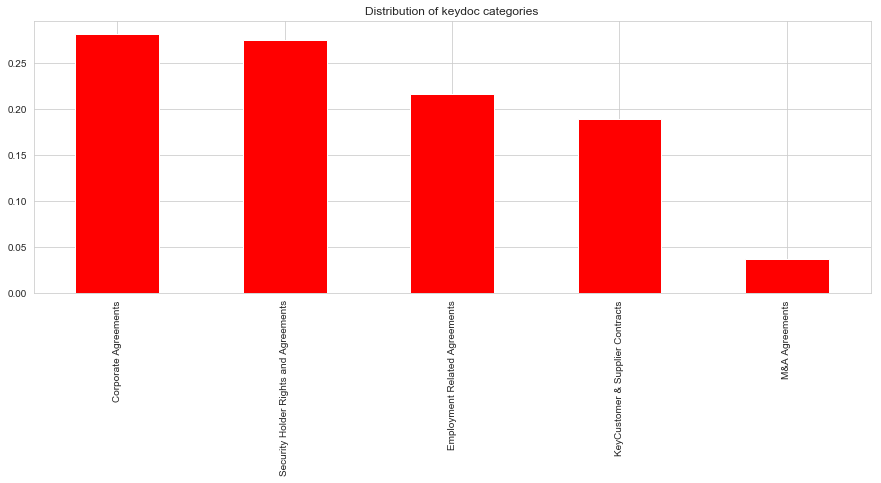

In [26]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
(keydocs_final.KeyDocumentGroupName.value_counts()/len(keydocs_final)).plot(title="Distribution of keydoc categories",kind='bar',color='red')
plt.show()

In [53]:
keydocs_final=keydocs_final[["VersionId","exhibitTypeName","text","KeyDocumentGroupName"]]

In [54]:
keydocs_final.head(2)

,VersionId,exhibitTypeName,text,KeyDocumentGroupName
0,112108432,EX-3.01,2 certificate of amendment to articles of inco...,Corporate Agreements
1,116691276,EX-3.1,2 - amendment no. 6 to fifth amended and rest...,Corporate Agreements


#### Text preprocessing

In [55]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        keydocs_final[column][index] = string

In [56]:
#text processing stage.
start_time = time.clock()
for index, row in keydocs_final.iterrows():
    if type(row['text']) is str:
        nlp_preprocessing(row['text'], index, 'text')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Time took for preprocessing the text : 591.9393603380013 seconds


C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [62]:
keydocs_final["text"]=keydocs_final["text"].apply(lambda x:re.sub("html","",x))
keydocs_final["text"]=keydocs_final["text"].apply(lambda x:re.sub("text","",x))

In [63]:
keydocs_final.head(2)

,versionid,exhibit,text,description,VersionId,exhibitTypeName,KeyDocumentGroupName
0,112108432,EX-3.01,2 certificate of amendment to articles of inco...,Certificate of amendment to articles of incorp...,112108432,EX-3.01,Corporate Agreements
1,116691276,EX-3.1,2 - amendment no. 6 to fifth amended and rest...,Amendment no. 6 to the fifth amended and resta...,116691276,EX-3.1,Corporate Agreements


In [64]:
keydocs_final.KeyDocumentGroupName.unique()

array(['Corporate Agreements', 'KeyCustomer & Supplier Contracts',
       'Employment Related Agreements', 'M&A Agreements',
       'Security Holder Rights and Agreements'], dtype=object)

In [65]:
keydocs_final["KeyDocumentGroupName"]=keydocs_final["KeyDocumentGroupName"].replace(to_replace="Security Holder Rights and Agreements",value=1)
keydocs_final["KeyDocumentGroupName"]=keydocs_final["KeyDocumentGroupName"].replace(to_replace="Corporate Agreements",value=2)
keydocs_final["KeyDocumentGroupName"]=keydocs_final["KeyDocumentGroupName"].replace(to_replace="M&A Agreements",value=3)
keydocs_final["KeyDocumentGroupName"]=keydocs_final["KeyDocumentGroupName"].replace(to_replace="KeyCustomer & Supplier Contracts",value=4)
keydocs_final["KeyDocumentGroupName"]=keydocs_final["KeyDocumentGroupName"].replace(to_replace="Employment Related Agreements",value=5)

In [66]:
keydocs_final.KeyDocumentGroupName.unique()

array([2, 4, 5, 3, 1], dtype=int64)

### Train-CV-Test Split

In [67]:
#Train-CV-Test Split
y_true = keydocs_final['KeyDocumentGroupName'].values
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(keydocs_final, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [68]:
y_true

array([2, 2, 4, ..., 1, 4, 4], dtype=int64)

In [70]:
print(train_df.shape)
print(cv_df.shape)
print(test_df.shape)

(7830, 7)
(1958, 7)
(2448, 7)


#### Plotting the Data distribution

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  """Entry point for launching an IPython kernel.
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  This is separate from the ipykernel package so we can avoid doing imports until


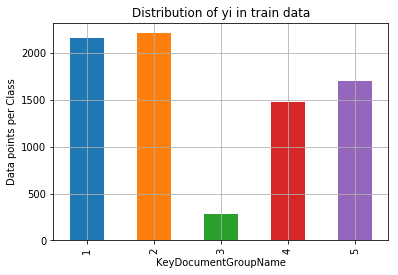

Number of data points in KeyDocumentGroupName 2 : 2209 ( 28.212 %)
Number of data points in KeyDocumentGroupName 1 : 2158 ( 27.561 %)
Number of data points in KeyDocumentGroupName 5 : 1696 ( 21.66 %)
Number of data points in KeyDocumentGroupName 4 : 1481 ( 18.914 %)
Number of data points in KeyDocumentGroupName 3 : 286 ( 3.653 %)
--------------------------------------------------------------------------------


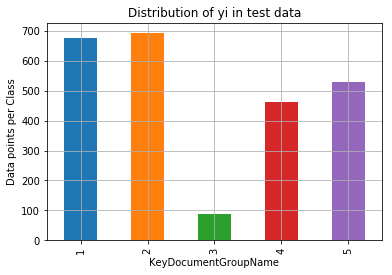

Number of data points in class 2 : 691 ( 28.227 %)
Number of data points in class 1 : 675 ( 27.574 %)
Number of data points in class 5 : 530 ( 21.65 %)
Number of data points in class 4 : 463 ( 18.913 %)
Number of data points in class 3 : 89 ( 3.636 %)
--------------------------------------------------------------------------------


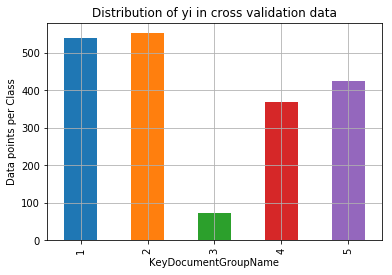

Number of data points in class 2 : 552 ( 28.192 %)
Number of data points in class 1 : 540 ( 27.579 %)
Number of data points in class 5 : 424 ( 21.655 %)
Number of data points in class 4 : 370 ( 18.897 %)
Number of data points in class 3 : 72 ( 3.677 %)


In [71]:
train_class_distribution = train_df['KeyDocumentGroupName'].value_counts().sortlevel()
test_class_distribution = test_df['KeyDocumentGroupName'].value_counts().sortlevel()
cv_class_distribution = cv_df['KeyDocumentGroupName'].value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('KeyDocumentGroupName')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in KeyDocumentGroupName', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('KeyDocumentGroupName')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

#TEST
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('KeyDocumentGroupName')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

#CV
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


In [73]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['text'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [74]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of words of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of words of Cross Validation appeared in train data")

96.028 % of words of test data appeared in train data
98.261 % of words of Cross Validation appeared in train data


#### Define TF-IDF Vectorizer

In [76]:
vect_word = TfidfVectorizer(max_features=10000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
vect_char = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='char',
                        stop_words= 'english',ngram_range=(3,6),dtype=np.float32)

#### Training the Vocabulary from Train data text using TF-IDF

In [77]:
tr_vect = vect_word.fit_transform(train_df['text'])
tr_vect_char = vect_char.fit_transform(train_df['text'])

#### CV and Test data Vectorization

In [78]:
#CV Data
cv_vect=vect_word.transform(cv_df['text'])
cv_vect_char=vect_char.transform(cv_df['text'])

#Test Data
ts_vect = vect_word.transform(test_df['text'])
ts_vect_char = vect_char.transform(test_df['text'])

In [79]:
vect_word.get_feature_names()[1000:1010]

['appropriate',
 'appropriate action',
 'appropriate proceedings',
 'appropriate reflect',
 'appropriate reflect relative',
 'appropriately',
 'approval',
 'approval authorization',
 'approval company',
 'approval shall']

In [80]:
tr_vect.get_shape()

(7830, 10000)

In [81]:
from scipy import sparse
X = sparse.hstack([tr_vect, tr_vect_char])
x_cv=sparse.hstack([cv_vect, cv_vect_char])
x_test = sparse.hstack([ts_vect, ts_vect_char])
y=train_df.KeyDocumentGroupName.values
y_cv=cv_df.KeyDocumentGroupName.values
y_test=test_df.KeyDocumentGroupName.values

### Model Building and Metrics Analysis

In [83]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [1,2,3,4,5]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix ", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix ", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

### Naive Baiyes

In [84]:
#alpha is the hyperparameter.
alpha = [10 ** x for x in range(-8,3)]
for i in alpha:
    clf_NB = MultinomialNB(alpha=i)
    clf_NB.fit(X,y)
    print(i,accuracy_score(y_cv,clf_NB.predict(x_cv))) 

1e-08 0.9351378958120531
1e-07 0.9351378958120531
1e-06 0.9351378958120531
1e-05 0.9351378958120531
0.0001 0.9346271705822268
0.001 0.9346271705822268
0.01 0.9341164453524005
0.1 0.9330949948927477
1 0.9167517875383044
10 0.8513789581205311
100 0.7236976506639428


##### 93.5% is the best accuracy elicited by Naive Baiyes 

### Logistic Regression using SGD Classifier

##### Class Weight = Balanced

In [87]:
#Alpha is the hyperparameter
#With Class weight as "Balanced"
alpha = [10 ** x for x in range(-12, 3)]
for i in alpha:
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X,y)
    print(i,accuracy_score(y_cv,clf.predict(x_cv)))

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


1e-12 0.923391215526047
1e-11 0.9382022471910112
1e-10 0.9570990806945863
1e-09 0.916241062308478
1e-08 0.9239019407558733
1e-07 0.9540347293156282
1e-06 0.9412665985699693
1e-05 0.9530132788559755
0.0001 0.9540347293156282
0.001 0.942288049029622
0.01 0.9141981613891726
0.1 0.8595505617977528
1 0.754341164453524
10 0.5944841675178754
100 0.18896833503575078


##### Class Weight = None

In [86]:
#Logistic Regression using SGD Classifier
#Alpha is the hyperparameter
#With Class weight as "None"
alpha = [10 ** x for x in range(-8, 3)]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X,y)
    print(i,accuracy_score(y_cv,clf.predict(x_cv)))

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


1e-08 0.9570990806945863
1e-07 0.9627170582226762
1e-06 0.9596527068437181
1e-05 0.9637385086823289
0.0001 0.9555669050051072
0.001 0.9315628192032687
0.01 0.8947906026557712
0.1 0.7722165474974464
1 0.6128702757916241
10 0.5796731358529111
100 0.18896833503575078


######################################################################################################################

In [89]:
clf = SGDClassifier(class_weight="balanced",alpha=1e-10, penalty='l2', loss='log', random_state=42)
clf.fit(X,y)
print("CV Accuracy is:",accuracy_score(y_cv,clf.predict(x_cv)))
print("Test Accuracy is:",accuracy_score(y_test,clf.predict(x_test)))

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


CV Accuracy is: 0.9570990806945863
Test Accuracy is: 0.9607843137254902


In [88]:
clf = SGDClassifier(alpha=1e-05, penalty='l2', loss='log', random_state=42)
clf.fit(X,y)
print("CV Accuracy is:",accuracy_score(y_cv,clf.predict(x_cv)))
print("Test Accuracy is:",accuracy_score(y_test,clf.predict(x_test)))

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


CV Accuracy is: 0.9637385086823289
Test Accuracy is: 0.9656862745098039


##### Accuracy, Confusion Matrix, Precision and Recall

-------------------- Confusion matrix --------------------


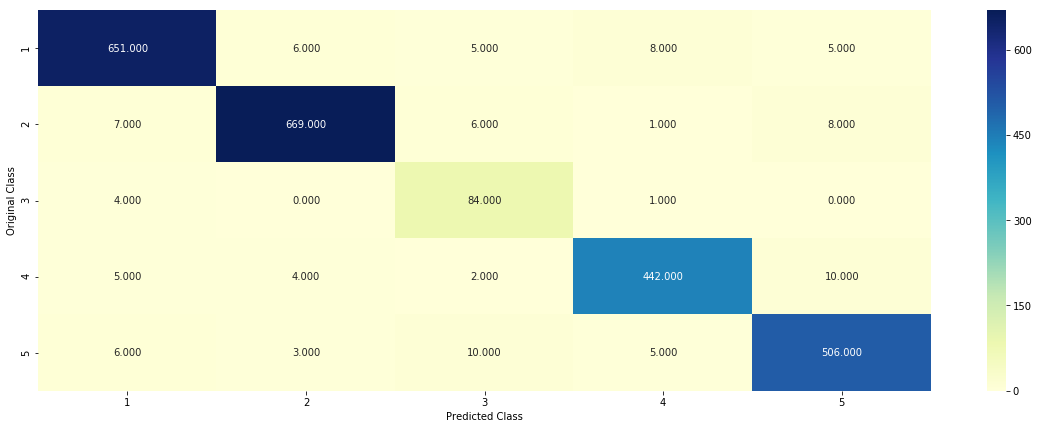

-------------------- Precision matrix  --------------------


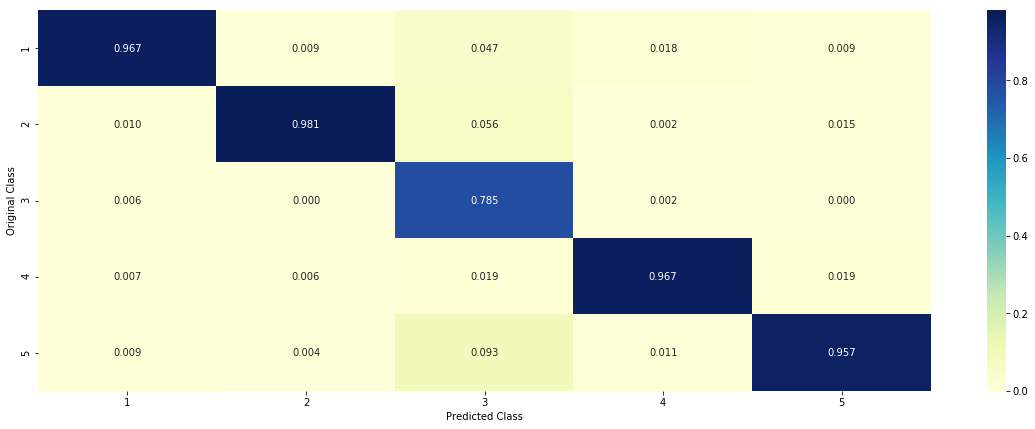

-------------------- Recall matrix  --------------------


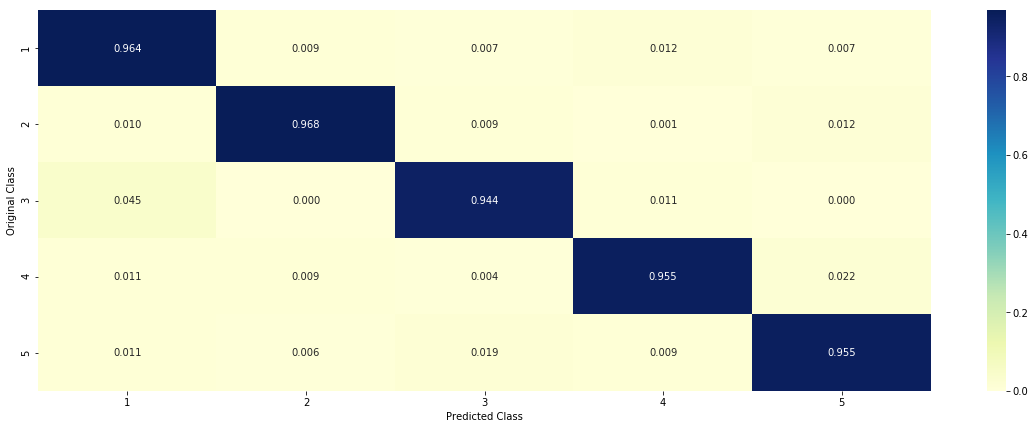

In [90]:
plot_confusion_matrix(y_test,clf.predict(x_test))

### XGBOOST

In [93]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(X, y)